In [11]:
 
# clustering(agrupamientos)
# El aprendizaje automático consiste en identificar de 
# patrones o tendencias que de los datos de forma automática.


In [12]:
import pandas as pd
import seaborn as sns

In [13]:
iris = pd.read_csv("iris_data.txt", sep="\t")
iris

FileNotFoundError: [Errno 2] No such file or directory: 'iris_data.txt'

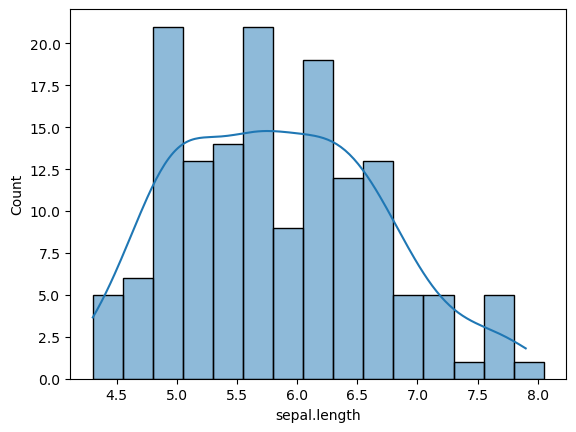

In [ ]:

g = sns.histplot(data = iris, x = "sepal.length", binwidth=0.25, kde = True)
#grafico


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_escaleado = scaler.fit_transform(iris)

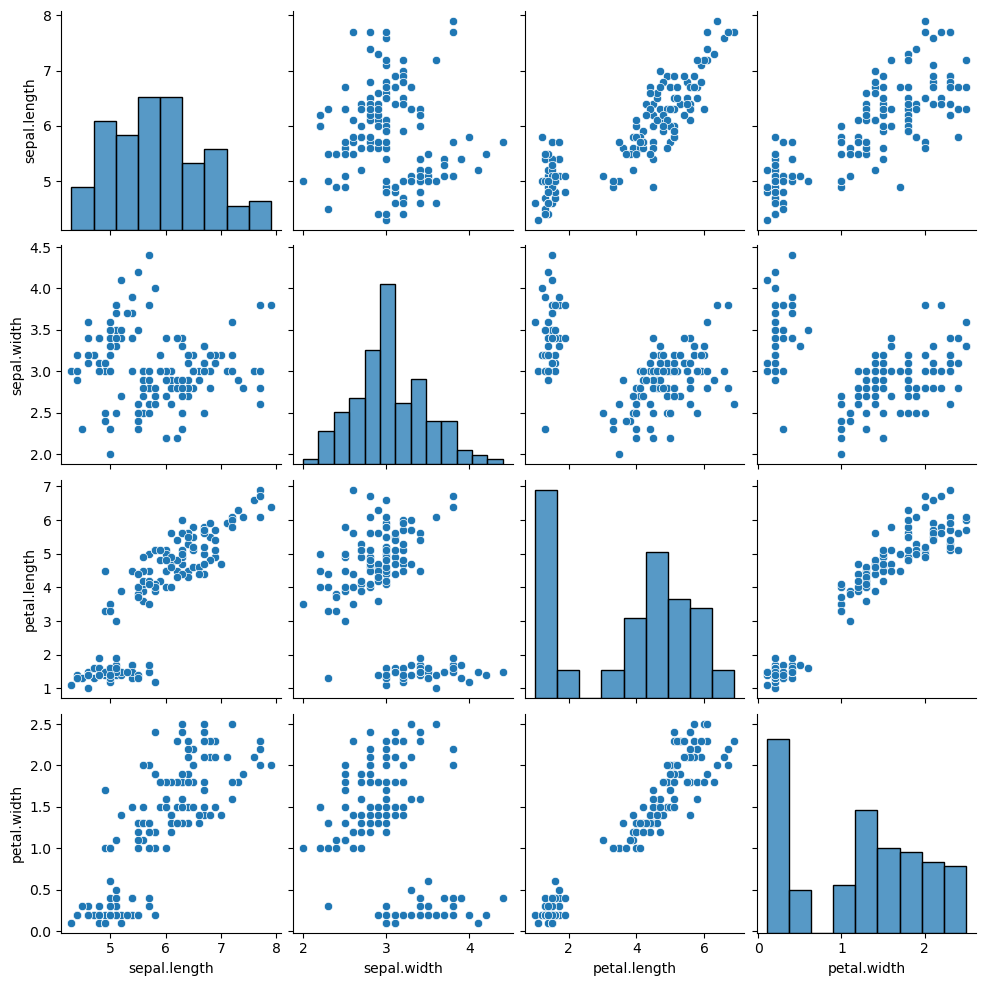

In [ ]:
g = sns.pairplot(iris)

In [ ]:
scaler = StandardScaler()
iris_escaleado = scaler.fit_transform(iris)
# normalizado y escalado de los datos
# ( asegurarnos de que aún cuandoalgunas variables toman valores más grandes
#  no se usarán como predictor principal a la hora de clasificar.)

In [ ]:
from sklearn.cluster import KMeans, DBSCAN #Para usar kmeans

k = 5  #definimos la cantidad de clusters

kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=600, random_state=123457) 
#tomamos los centroides de forma aleatoria y definimos un máximo de 300 iteraciones

kmeans.fit(iris_escaleado)  #aplicamos el método a nuestros datos

KMeans(init='random', max_iter=600, n_clusters=5, random_state=123457)

In [ ]:

print(kmeans.labels_) #esta propiedad me dice que etiqueta le puso a cada uno de mis datos.

[1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1
 0 0 0 1 0 0 1 1 0 1 0 1 0 2 2 2 3 2 3 2 3 2 3 3 2 3 2 3 2 2 3 3 3 2 2 2 2
 2 2 2 2 2 3 3 3 3 2 2 2 2 3 2 3 3 2 3 3 3 2 2 2 3 3 4 2 4 2 4 4 3 4 2 4 4
 2 4 3 2 4 2 4 4 3 4 2 4 2 4 4 2 2 2 4 4 4 2 2 2 4 4 2 2 4 4 4 2 4 4 4 2 2
 4 2]


In [ ]:
#Los centroides pueden ser obtenidos con cluster_centers_:
print(kmeans.cluster_centers_ )

[[-1.28213558  0.22643209 -1.30968035 -1.29836862]
 [-0.70049078  1.56529014 -1.29924123 -1.20436862]
 [ 0.44478706 -0.33707699  0.60993206  0.55503506]
 [-0.33846225 -1.30048466  0.13951053  0.05960108]
 [ 1.40150837  0.24357305  1.20294131  1.28239709]]


In [14]:
#graficar
colores = ["red", "green", "blue", "black", "yellow"]
g = sns.scatterplot(x = iris_escaleado[:,0], y = iris_escaleado[:, 4], hue = kmeans.labels_, palette = colores, alpha = 0.5)
g = sns.scatterplot(x = kmeans.cluster_centers_[0,1], y = kmeans.cluster_centers_[0,1], zorder = 10, palette = colores, hue = [0, 1, 2, 3, 4], legend = False, marker=6, s=200)

NameError: name 'iris_escaleado' is not defined

In [ ]:
#calcular cuan compactos son los grupos obtenidos
print(kmeans.inertia_ )

NameError: name 'kmeans' is not defined

In [ ]:
#nos dice para cada punto, si está cerca de su cluster 
# y lejos del resto (coeficiente cercano a 1) o si está 
# lejos de su cluster y cerca del resto (coeficiente cercano a -1)

from sklearn.metrics import silhouette_samples, silhouette_score #Para el coeficiente de silhouette
#Calculamos el promedio del silhouette de todos
silhouette_avg = silhouette_score(iris_escaleado, kmeans.labels_)
#Calculamos el silhouette de cada punto
sample_silhouette_values = silhouette_samples(iris_escaleado, kmeans.labels_)

In [ ]:
#para graficar

import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
import numpy as np
def graficarSilhouette (k, labels, sample_silhouette_values, silhouette_avg):
  fig, ax1 = plt.subplots(1, 1)
  y_lower = 10
  for i in range(k):
      ith_cluster_silhouette_values = \
          sample_silhouette_values[labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / k)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
      y_lower = y_upper + 10

  ax1.set_title("Plot del silhouette de cada cluster")
  ax1.set_xlabel("Coeficiente de silhouette")
  ax1.set_ylabel("Etiqueta del cluster")
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax1.set_yticks([]) 

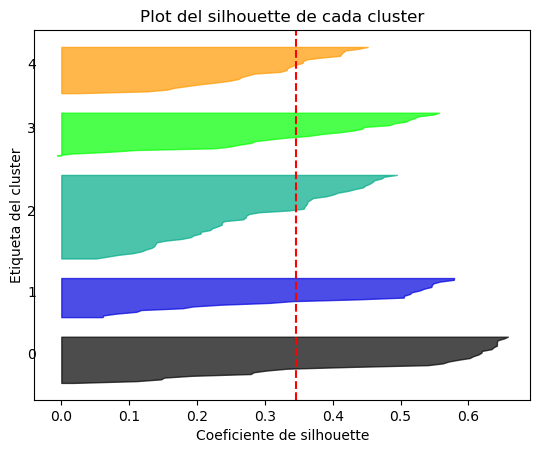

In [ ]:
graficarSilhouette (k, kmeans.labels_, sample_silhouette_values, silhouette_avg)
